### Student Details

Student name: Muhammad Khubaib Akram

Student ID:23098929

In [78]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [79]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [80]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):

            output= self.activation(self.net_input(X))
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            #Logistic RegressionGD COST function
            cost = -y.dot(np.log(output)) + (1-y).dot(np.log(1-output))

            self.cost_.append(cost)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
      # Clipping the value for numerical stability
        X= np.clip(X,-250,250)
        return 1 / (1+ np.exp(-X)) # returning the sigmoid function value


    def predict(self, X):
      # if value is less 0.5 below line will assign 1 otherwise 0
        return np.where(self.activation( (self.net_input(X))) >= 0.5, 1, 0)


In [81]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

# get google drive file path to read the iris_data.CSV
file_path = "/content/drive/My Drive/Colab Notebooks/Data/iris_data.csv"

# Reading the csv file using pandas
iris = pd.read_csv(file_path , header=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#getting the file path from my github
#file_path = '/content/drive/My Drive/Colab Notebooks/DEML/plot_decision_boundary.py'
#importing
#from plot_decision_boundary import plot_decision_boundary

# From https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/

## NOTE: At first my import was working fine, I had imported the file from my github, unfortnately on the next day it wasnt working. I tried both google drive and github. So, now I have just copied the function from the plot_decision_boundary.py

import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

###1-Read the Iris-setosa and Iris-versicolor, sepal length and petal length

In [83]:
# Extract the Iris-setosa and Iris-virginica samples and petal length and width
setosa_versicolor_df = iris[iris[' class'].isin(['Iris-setosa', 'Iris-versicolor'])]
print(setosa_versicolor_df.head())

# Separate data for petal length and petal width
features_df = setosa_versicolor_df[['sepal_length',' petal_length']]

features_df.head()

   sepal_length   sepa_width   petal_length   petal_width        class
0           5.1          3.5            1.4           0.2  Iris-setosa
1           4.9          3.0            1.4           0.2  Iris-setosa
2           4.7          3.2            1.3           0.2  Iris-setosa
3           4.6          3.1            1.5           0.2  Iris-setosa
4           5.0          3.6            1.4           0.2  Iris-setosa


,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


###2- Train the algorithm

In [84]:
X = features_df.values # X is the features in our dataset

# Converting class labels to -1 (Iris-setosa) and 1 (Iris-virginica)
y = np.where(setosa_versicolor_df[' class'] == 'Iris-setosa', 0, 1)

#create an object of Perceptron with eta= 0.01 and 50 epoch
logReg_GD = LogisticRegressionGD(eta=0.01, epochs=50)

#training the perceptron
#logReg_GD.train(X, y)
logReg_GD.train(X, y)

###3-Plot the Logistic cost per epoch of training

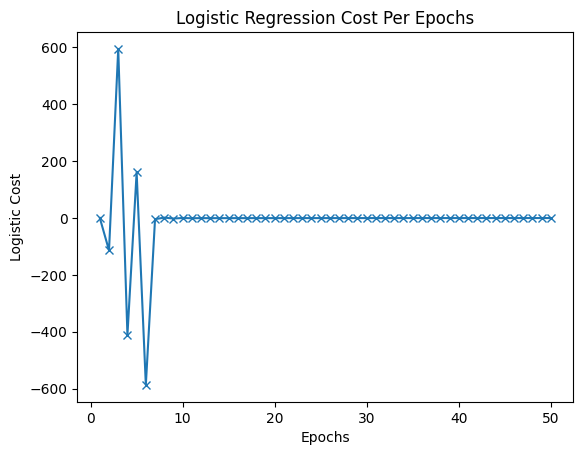

In [85]:
# Plotting the Logistic cost per epoch of training
plt.plot(range(1, len(logReg_GD.cost_) + 1), logReg_GD.cost_, marker='x')
#Labeling Epochs on X-axis
plt.xlabel('Epochs')
#Labeling Logistic Cost on Y-axis
plt.ylabel('Logistic Cost')
#Providing the Title for the plot
plt.title('Logistic Regression Cost Per Epochs')
plt.show()

###4-Plot the decision boundary using the supplied plot_decision_boundary function

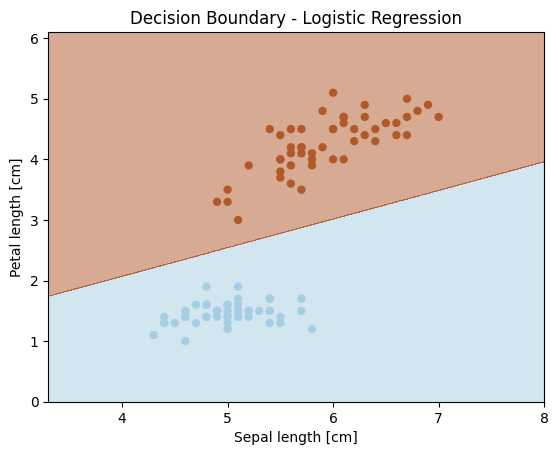

In [86]:
#plotting decision boundary using the plot_decision_boundary fucntion provided by the professor
plot_decision_boundary(X, y, logReg_GD)
plt.title('Decision Boundary - Logistic Regression')
#Labeling X-axis as Sepal Lenght
plt.xlabel('Sepal length [cm]')
#Labeling y-axis as Petal Lenght
plt.ylabel('Petal length [cm]')
plt.show()

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

####1-Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels

    Iris-setosa = 0
    Iris-versicolor = 1
    Iris-virginica = 2


In [87]:
#importing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [88]:

################################
# Your code here

#1-Get the petal_length and petal_width of the Iris data and assigned the class labels
#iris = pd.read_csv(file_path , header=0)

# iris contains the whole iris_data.csv - As I have already read the csv file for above question. SO, I am re-using Iris variable.
# Separate data for petal length and petal width
X = iris[[' petal_length', ' petal_width']].values

#Assign the class labels
y = iris[' class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values



####2-split into 30% test and 70% training data

In [89]:
# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
#Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=50)

####3-Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data


<ipython-input-90-121675690b71>:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap='viridis', marker='x', edgecolor='k')


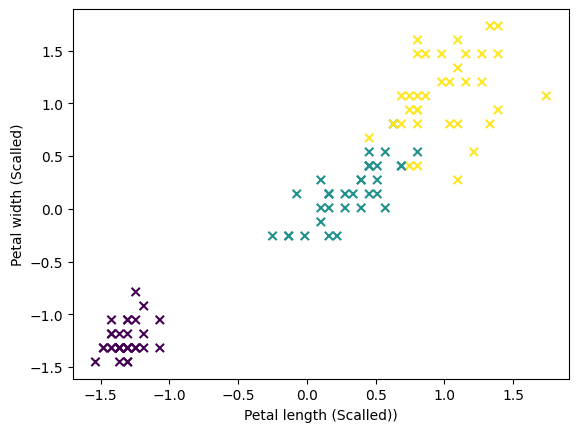

In [90]:

#Plot the scaled data
sc = StandardScaler()

# Scalling the data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#plotting using the scatter plot

plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap='viridis', marker='x', edgecolor='k')
plt.xlabel('Petal length (Scalled))')
plt.ylabel('Petal width (Scalled)')
plt.show()

####4-Train an instance of the scikitlearn LogisticRegression algorithm on the provided data

    You can use all the default parameters

Plot the decision boundary using the supplied plot_decision_boundary function

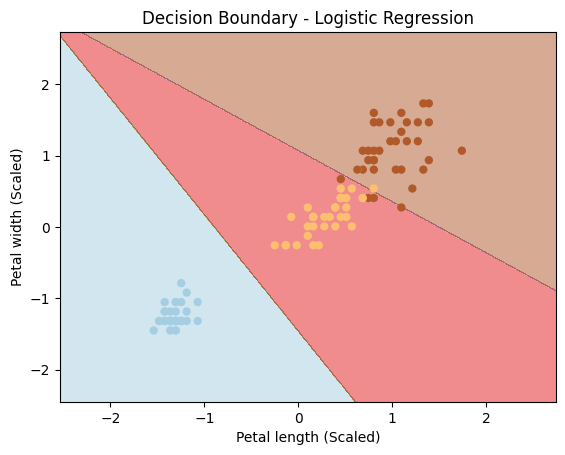

In [91]:

#Train Logistic Regression model
logReg = LogisticRegression(random_state=42)
logReg.fit(X_train_std, y_train)

# plot decision boundary
# from plot_decision_boundary import plot_decision_boundary
plot_decision_boundary(X_train_std, y_train, logReg)
plt.title('Decision Boundary - Logistic Regression')
plt.xlabel('Petal length (Scaled)')
plt.ylabel('Petal width (Scaled)')
plt.show()


####5-Using sklearn's accuracy_score, calculate the accuracy score on the test data

In [92]:
#importing accuracy_score from sklearn's
from sklearn.metrics import accuracy_score

#predicting
y_predicting = logReg.predict(X_test_std)

#calculating accuracy
accuracy = accuracy_score(y_test, y_predicting)

#printing the accuracy with upto 5 decimal point
print(f"Accuracy: {accuracy:.5f}")


Accuracy: 0.97778


####6-Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)

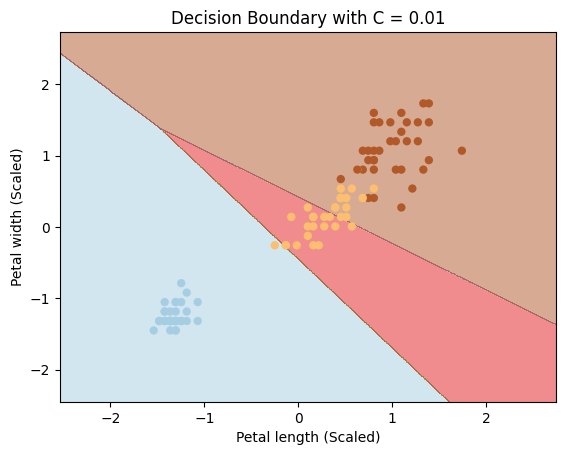

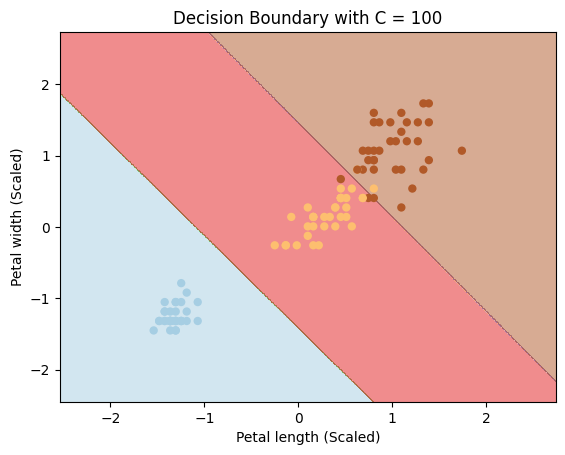

In [93]:
for C in [0.01, 100]: #
    #Create new Object of LogisticRegression with Value of C
    logReg1 = LogisticRegression(C=C, random_state=42)
    #Fit the data based on training data
    logReg1.fit(X_train_std, y_train)

    #Plot the decision boundary
    plot_decision_boundary(X_train_std, y_train, logReg1)
    #Title of the plot with C value
    plt.title(f'Decision Boundary with C = {C}')
    #Label at X-axis
    plt.xlabel('Petal length (Scaled)')

    #Label at y-axis
    plt.ylabel('Petal width (Scaled)')
    plt.show()

####7-Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your text answers below</span>.



1.   When C value is small, it makes the regularization value large/strong which means that it will penalizes the values/magnitudes of parameter coefficients very small. If regularization value is too strong it can even lead to underfitting. For exampe in our case when C=0.01, regularization was very strong which lead to underfitting.
2.   When C value is large, it makes the regularization value small/weaker which means that it wont penalize the magnitudes/values of parameter coefficients that much. It leads to higher values of magnitudes/values of parameter coefficients. It might lead to overfit the data if regularization value is very small. But in our example where C=100, it working fine I think as it contains outliers as well. it didnt overfit with C=100. If we had gone with much higher value of C, it would definitely lead to overfitting and may not generalise good on the unseen data.



# Task 3: Multi-class Linear SVM

> Indented block



1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

####1-Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels

    Iris-setosa = 0
    Iris-versicolor = 1
    Iris-virginica = 2


In [94]:
################################
# Your code here

#1-Get the petal_length and petal_width of the Iris data and assigned the class labels
#iris = pd.read_csv(file_path , header=0)

# Separate data for petal length and petal width
X = iris[[' petal_length', ' petal_width']].values

#Assign the class labels, assigning values according to the flower type
y = iris[' class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

####2-split into 30% test and 70% training data

In [95]:

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
#Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=33)


####3-Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data


In [96]:
#Plot the scaled data
sc = StandardScaler()

# Scalling the data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

print("X Scaled Trained Data: ", X_train_std)
print("---------------------------")
print("X Scaled Test Data", X_test_std)

X Scaled Trained Data:  [[-0.04723614 -0.2679328 ]
 [-0.15995874 -0.2679328 ]
 [ 0.62909948  0.39246494]
 [ 0.06548646 -0.13585325]
 [ 0.96726728  0.78870358]
 [ 0.40365427  0.39246494]
 [ 0.68546078  0.92078313]
 [-1.34354607 -1.19248962]
 [ 1.02362859  1.31702177]
 [ 0.12184777  0.12830585]
 [-1.28718477 -1.06041008]
 [ 0.68546078  0.65662403]
 [ 0.79818338  1.05286267]
 [ 1.07998989  1.44910131]
 [ 0.40365427  0.39246494]
 [ 0.12184777  0.12830585]
 [ 1.13635119  1.31702177]
 [ 0.06548646 -0.0037737 ]
 [ 0.17820907  0.12830585]
 [ 0.51637687  0.52454449]
 [ 1.13635119  0.78870358]
 [ 0.12184777  0.12830585]
 [ 0.29093167  0.12830585]
 [ 1.24907379  1.71326041]
 [ 0.51637687 -0.0037737 ]
 [-1.28718477 -1.06041008]
 [-1.28718477 -1.32456917]
 [ 0.57273818  0.78870358]
 [ 0.74182208  0.39246494]
 [-1.34354607 -1.32456917]
 [-1.39990737 -1.19248962]
 [-1.28718477 -1.32456917]
 [ 0.62909948  0.39246494]
 [-0.27268134 -0.2679328 ]
 [-1.39990737 -1.32456917]
 [ 0.74182208  0.92078313]
 [ 0



4.   Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
  You can use all the default parameters, except set the kernel to linear





In [97]:
from sklearn.svm import SVC

#Support vector classification using linear kernel
svm = SVC(kernel='linear', random_state=32)
#Fit the SVM model according to the given scalled training data.
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=32)

####5-Plot the decision boundary using the supplied plot_decision_boundary function


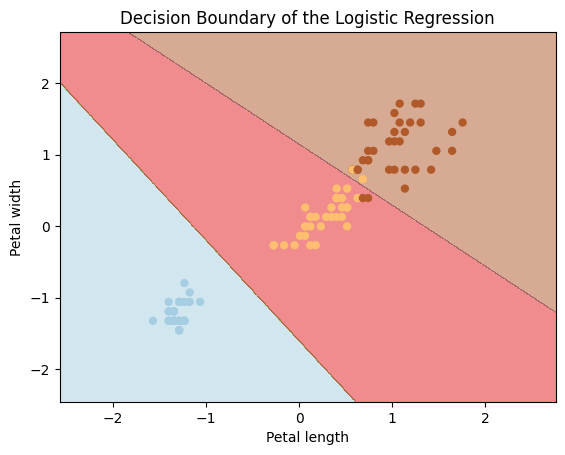

In [98]:
#Plotting the decision boundary
plot_decision_boundary(X_train_std, y_train, svm)
plt.title('Decision Boundary of the Logistic Regression')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

####6-Using sklearn's accuracy_score, calculate the accuracy score on the test data

In [99]:
#predicting
y_predicting = svm.predict(X_test_std)

#calculating accuracy
accuracy = accuracy_score(y_test, y_predicting)

print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.93333


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

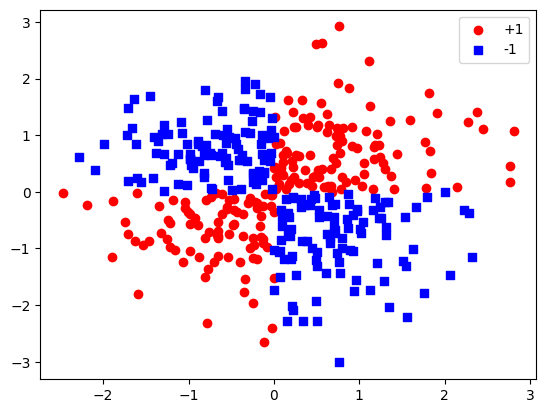

In [100]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

####1-Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data

In [101]:
################################
# Your code here

#Support vector classification using the radial basis function (RBF) kernel, also known as the Gaussian kernel
svm_rbf = SVC(kernel='rbf', gamma=0.1, random_state=42)
#Fit the SVM model according to the given training data.
svm_rbf.fit(X_r, y_r)

SVC(gamma=0.1, random_state=42)

####2-Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)

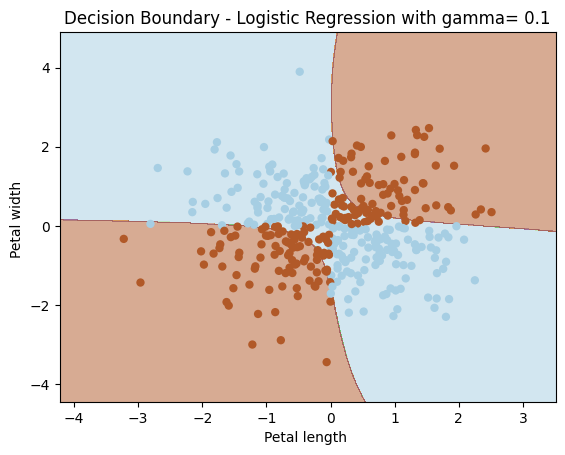

In [74]:
#Plotting the decision boundary
plot_decision_boundary(X_r, y_r, svm_rbf)
plt.title('Decision Boundary - Logistic Regression with gamma= 0.1')
plt.xlabel('Petal length ')
plt.ylabel('Petal width ')
plt.show()

####3- Change the gamma value to 100. What happens? What is the problem with this result?
    The problem with this results is that its overfit.

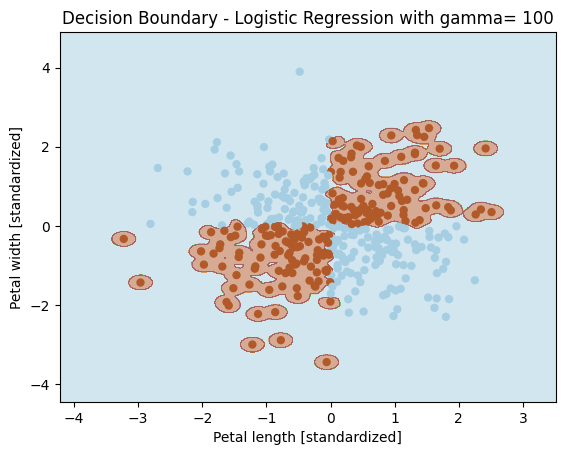

In [75]:
#Support vector classification using the radial basis function (RBF) kernel, also known as the Gaussian kernel
svm_rbf_g100 = SVC(kernel='rbf', gamma=100, random_state=42)
svm_rbf_g100.fit(X_r, y_r)


plot_decision_boundary(X_r, y_r, svm_rbf_g100)
plt.title('Decision Boundary - Logistic Regression with gamma= 100')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()

####4- Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

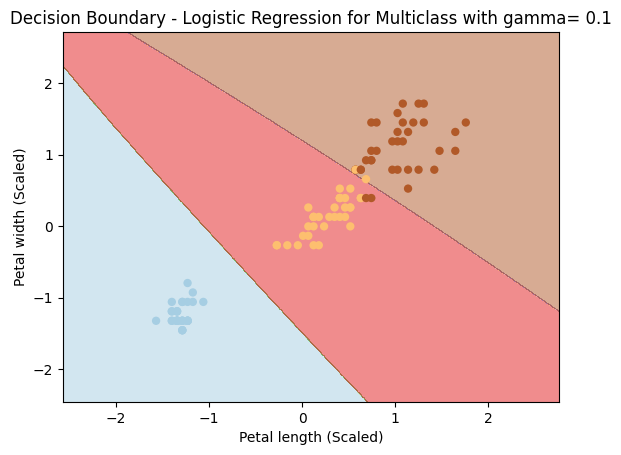

In [76]:
#Support vector classification using the radial basis function (RBF) kernel, also known as the Gaussian kernel
svm_rbf_MC_Gpoint1 = SVC(kernel='rbf', gamma=0.1, random_state=42)
svm_rbf_MC_Gpoint1.fit(X_train_std, y_train) # Scalled training data

#plotting the decision boundary of SVM with RBF with gamma = 0.1
plot_decision_boundary(X_train_std, y_train, svm_rbf_MC_Gpoint1)
plt.title('Decision Boundary - Logistic Regression for Multiclass with gamma= 0.1')
plt.xlabel('Petal length (Scaled)')
plt.ylabel('Petal width (Scaled)')
plt.show()

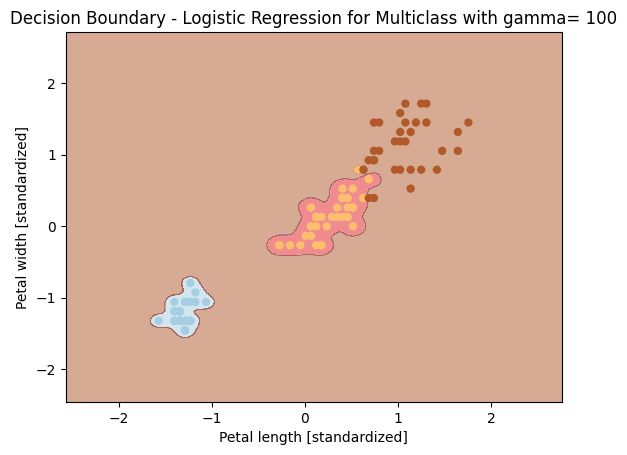

In [77]:
#Support vector classification using the radial basis function (RBF) kernel, also known as the Gaussian kernel. With gamma value 100
svm_rbf_MC_G100 = SVC(kernel='rbf', gamma=100, random_state=42)
svm_rbf_MC_G100.fit(X_train_std, y_train)

#plotting the decision boundary of SVM with RBF with gamma = 100
plot_decision_boundary(X_train_std, y_train, svm_rbf_MC_G100)
plt.title('Decision Boundary - Logistic Regression for Multiclass with gamma= 100')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()